In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the Data

df = pd.read_excel('City Power Consumption.xlsx')
df.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [ ]:
df.shape

(52583, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  float64
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.6+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum().sum()

np.int64(757)

In [ ]:
df.isnull().sum()

,0
S no,0
Temperature,320
Humidity,25
Wind Speed,71
general diffuse flows,308
diffuse flows,15
Air Quality Index (PM),18
Cloudiness,0
Power Consumption in A Zone,0


In [ ]:
# percentage of null values (we will remove the feature which containing greater than 25% null values)

df.isnull().sum()/len(df)

,0
S no,0.000000
Temperature,0.006086
Humidity,0.000475
Wind Speed,0.001350
general diffuse flows,0.005857
diffuse flows,0.000285
Air Quality Index (PM),0.000342
Cloudiness,0.000000
Power Consumption in A Zone,0.000000


In [ ]:
# removing the null values

df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
S no,0
Temperature,0
Humidity,0
Wind Speed,0
general diffuse flows,0
diffuse flows,0
Air Quality Index (PM),0
Cloudiness,0
Power Consumption in A Zone,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52145 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52145 non-null  int64  
 1   Temperature                   52145 non-null  object 
 2   Humidity                      52145 non-null  object 
 3   Wind Speed                    52145 non-null  float64
 4   general diffuse flows         52145 non-null  float64
 5   diffuse flows                 52145 non-null  float64
 6   Air Quality Index (PM)        52145 non-null  float64
 7   Cloudiness                    52145 non-null  int64  
 8    Power Consumption in A Zone  52145 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
# removing the unwanted characters by using regex and changing the Object datatype into Float datatype

for col in df.select_dtypes(include='object').columns:
  df[col] = df[col].replace(r'[^\d\.\-]', '', regex=True)
  df[col] = df[col].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52145 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52145 non-null  int64  
 1   Temperature                   52145 non-null  float64
 2   Humidity                      52145 non-null  float64
 3   Wind Speed                    52145 non-null  float64
 4   general diffuse flows         52145 non-null  float64
 5   diffuse flows                 52145 non-null  float64
 6   Air Quality Index (PM)        52145 non-null  float64
 7   Cloudiness                    52145 non-null  int64  
 8    Power Consumption in A Zone  52145 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 4.0 MB


In [ ]:
# removing the unwanted columns

df = df.drop(columns=['S no'])
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,6.121,75.0,0.083,0.091,0.096,151.0,1,28228.86076
4,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [ ]:
# Creating the new relevent columns using existed columns

df['Temp_Humidity'] = df['Temperature'] * df['Humidity']
df['Diffuse_Ratio'] = df['diffuse flows'] / (df['general diffuse flows'] + 1)
df['Wind_Humidity_Ratio'] = df['Wind Speed'] / (df['Humidity'] + 1)
df['AQ_Humidity'] = df['Air Quality Index (PM)'] * df['Humidity']

In [ ]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone,Temp_Humidity,Diffuse_Ratio,Wind_Humidity_Ratio,AQ_Humidity
count,52145.000000,52145.000000,52145.000000,52145.000000,52145.000000,52145.000000,52145.000000,52145.000000,52145.000000,52145.000000,52145.000000,52145.000000
mean,18.840984,68.238597,1.968434,182.861960,75.195083,154.499530,0.007038,31112.183719,1244.079282,0.370150,0.032431,10542.997805
std,5.810479,15.571295,2.350838,264.757717,124.433309,2.872062,0.083598,8008.047631,387.772899,0.357825,0.043629,2414.866409
min,3.247000,11.340000,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760,267.552800,0.010148,0.000583,1758.640000
25%,14.430000,58.270000,0.078000,0.062000,0.122000,152.000000,0.000000,24804.551420,951.039000,0.104956,0.001035,8991.550000
50%,18.840000,69.850000,0.086000,4.987000,4.411000,155.000000,0.000000,31236.196720,1213.758000,0.145387,0.001533,10786.660000
75%,22.920000,81.400000,4.915000,319.600000,101.300000,157.000000,0.000000,36763.076920,1506.841000,0.748007,0.065179,12561.000000
max,40.010000,94.800000,6.483000,1163.000000,936.000000,159.000000,1.000000,52204.395120,2391.030000,1.668038,0.369555,14946.800000


In [ ]:
# checking the skewness

df.skew()

,0
Temperature,0.192693
Humidity,-0.623611
Wind Speed,0.454474
general diffuse flows,1.306256
diffuse flows,2.452375
Air Quality Index (PM),-0.001663
Cloudiness,11.794048
Power Consumption in A Zone,0.028584
Temp_Humidity,0.359153
Diffuse_Ratio,0.879400


Temperature                      0.192693
Humidity                        -0.623611
Wind Speed                       0.454474
general diffuse flows            1.306256
diffuse flows                    2.452375
Air Quality Index (PM)          -0.001663
Cloudiness                      11.794048
 Power Consumption in A Zone     0.028584
Temp_Humidity                    0.359153
Diffuse_Ratio                    0.879400
Wind_Humidity_Ratio              1.422460
AQ_Humidity                     -0.607866
dtype: float64


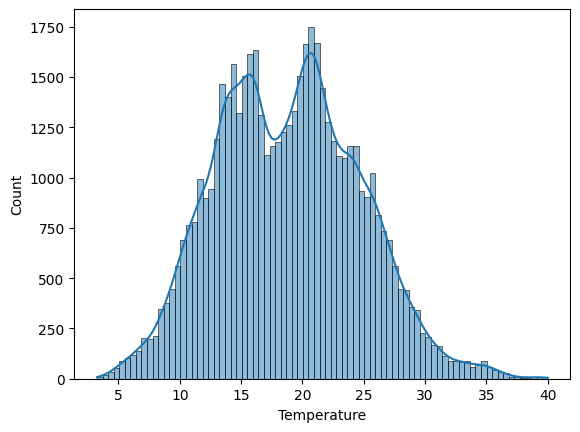

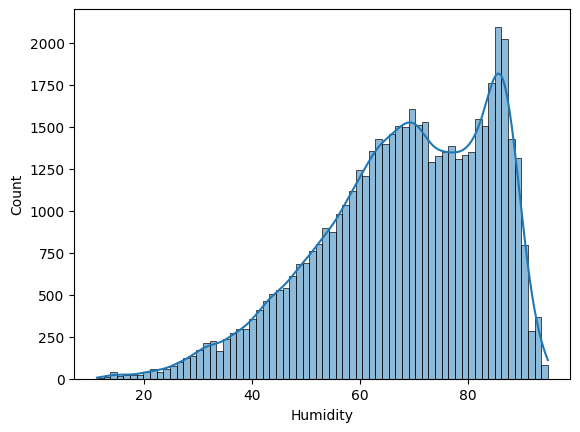

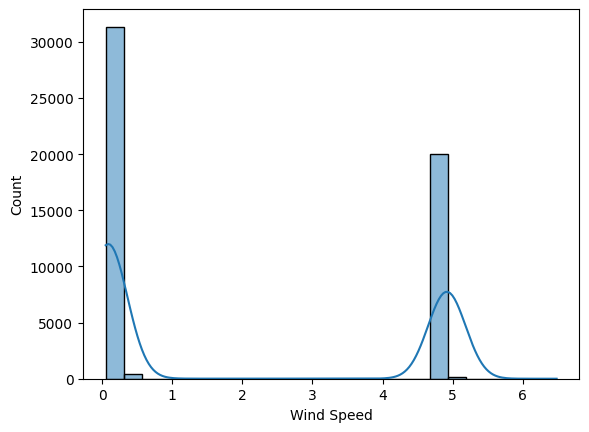

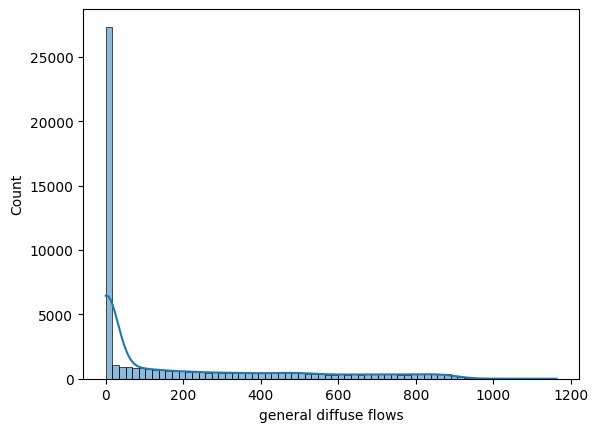

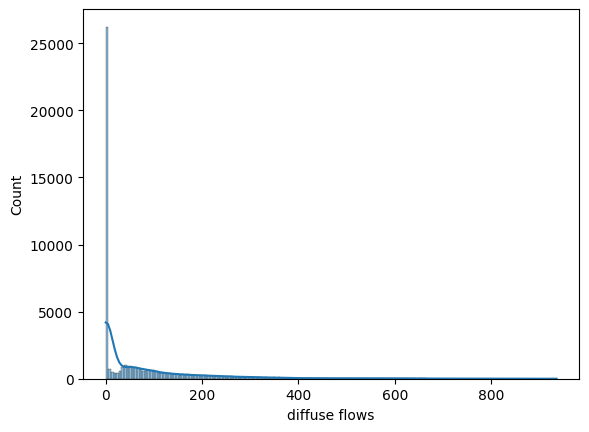

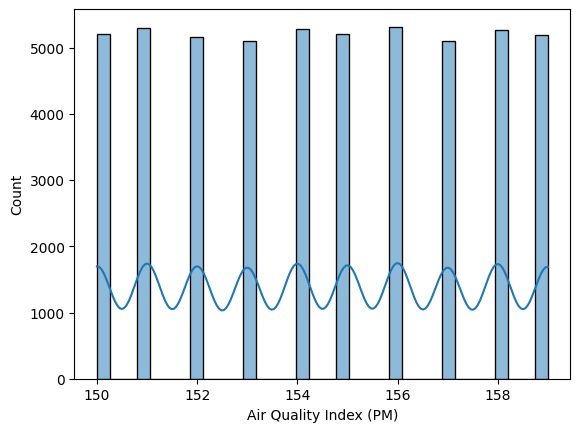

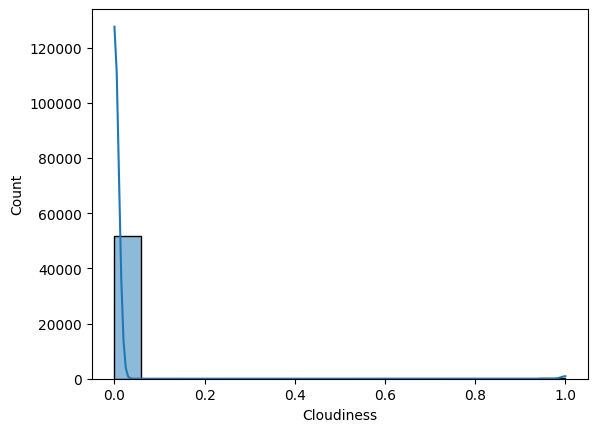

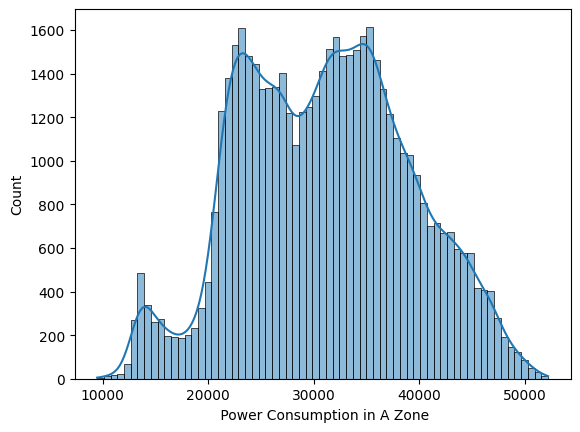

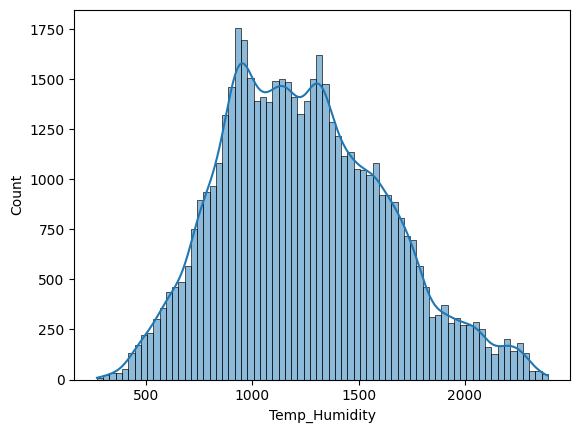

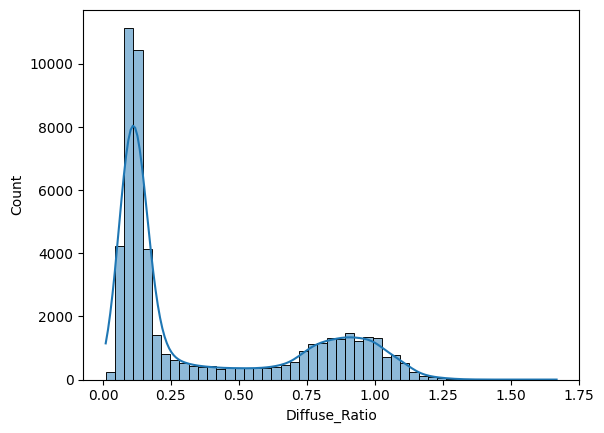

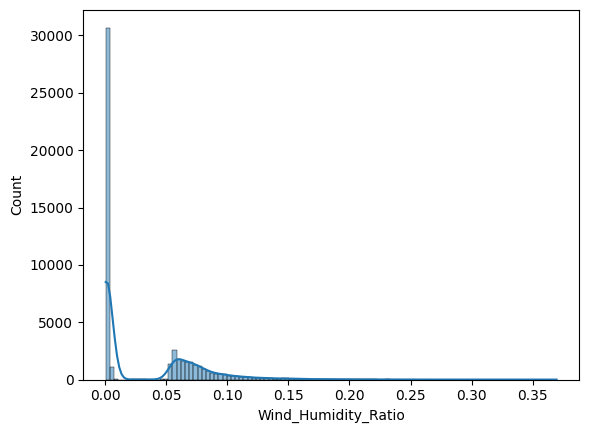

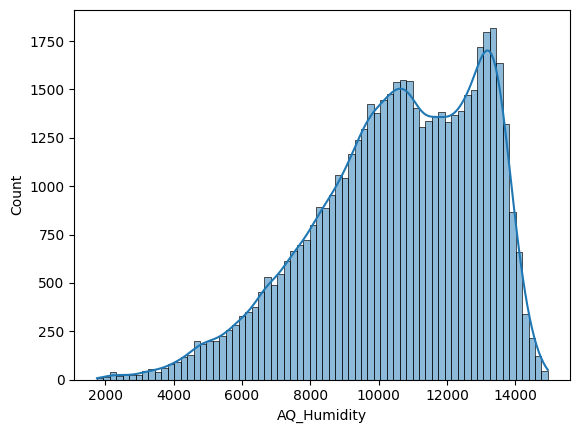

In [ ]:
# visualizing the skewness of the columns by using histogram plot

print(df.skew())
for col in df.columns:
  sns.histplot(df[col], kde =True)
  plt.show()

In [ ]:
# applying the log transformation technique for the columns having the skewness greater than 0.4

from scipy.stats import skew
for col in df.columns:
    sk = skew(df[col])
    if sk > 0.4:  # Only apply to positively skewed
            df[col] = np.log1p(df[col])

In [ ]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Air Quality Index (PM)', 'Cloudiness',
       ' Power Consumption in A Zone', 'Temp_Humidity', 'Diffuse_Ratio',
       'Wind_Humidity_Ratio', 'AQ_Humidity'],
      dtype='object')

In [ ]:
df.skew()

,0
Temperature,0.192693
Humidity,-0.623611
Wind Speed,0.448472
general diffuse flows,0.204122
diffuse flows,0.223147
Air Quality Index (PM),-0.001663
Cloudiness,11.794048
Power Consumption in A Zone,0.028584
Temp_Humidity,0.359153
Diffuse_Ratio,0.774487


In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

df['Humidity'] = pt.fit_transform(df[['Humidity']])
df['AQ_Humidity'] = pt.fit_transform(df[['AQ_Humidity']])

In [ ]:
df.skew()

,0
Temperature,0.192693
Humidity,-0.163316
Wind Speed,0.448472
general diffuse flows,0.204122
diffuse flows,0.223147
Air Quality Index (PM),-0.001663
Cloudiness,11.794048
Power Consumption in A Zone,0.028584
Temp_Humidity,0.359153
Diffuse_Ratio,0.774487


Temperature                      0.192693
Humidity                        -0.163316
Wind Speed                       0.448472
general diffuse flows            0.204122
diffuse flows                    0.223147
Air Quality Index (PM)          -0.001663
Cloudiness                      11.794048
 Power Consumption in A Zone     0.028584
Temp_Humidity                    0.359153
Diffuse_Ratio                    0.774487
Wind_Humidity_Ratio              1.276732
AQ_Humidity                     -0.157838
dtype: float64


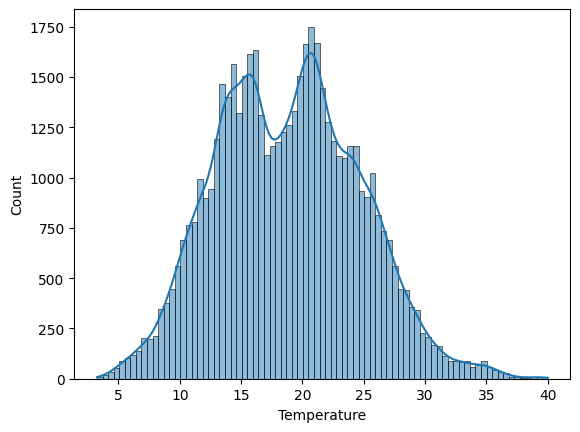

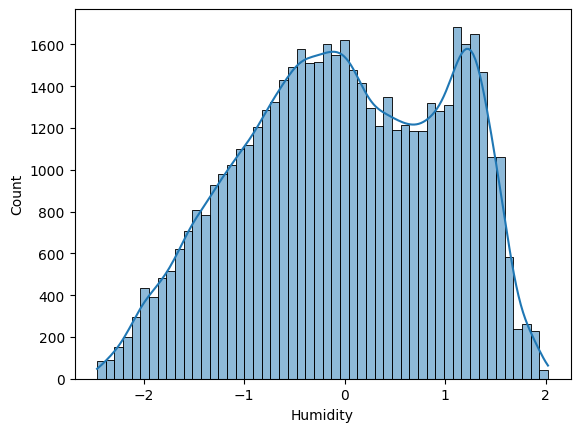

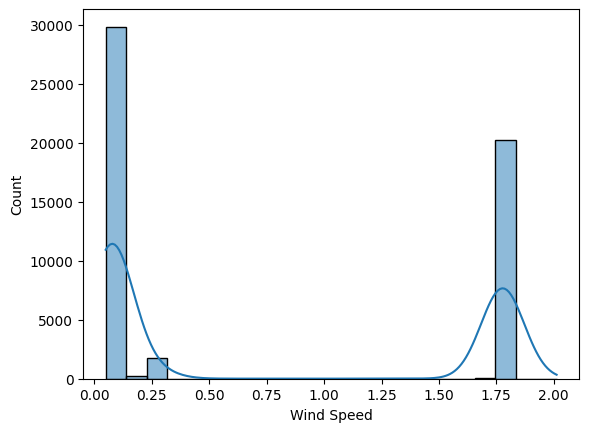

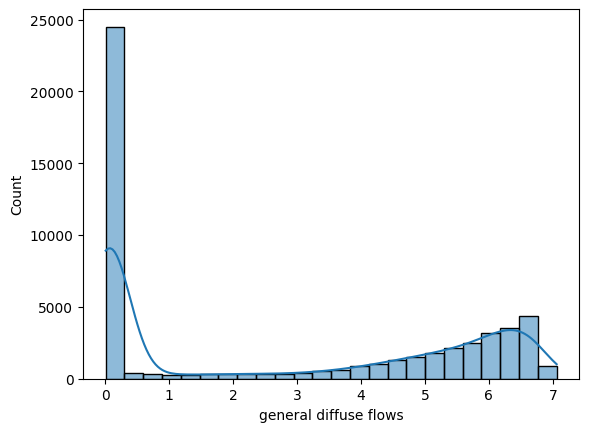

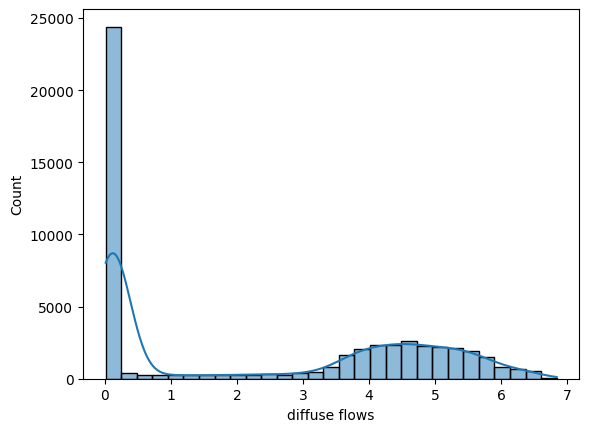

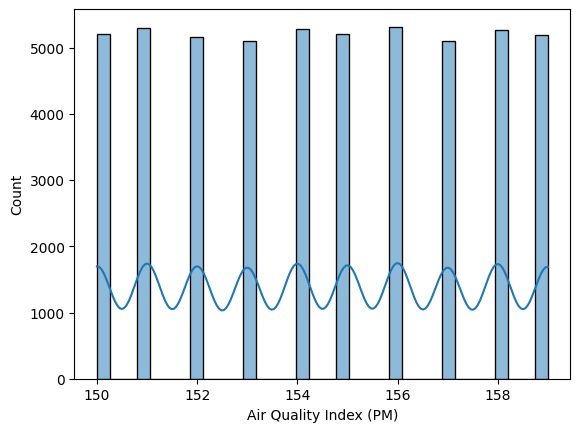

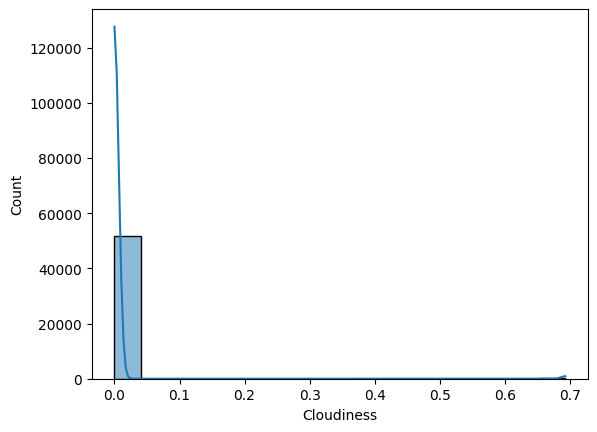

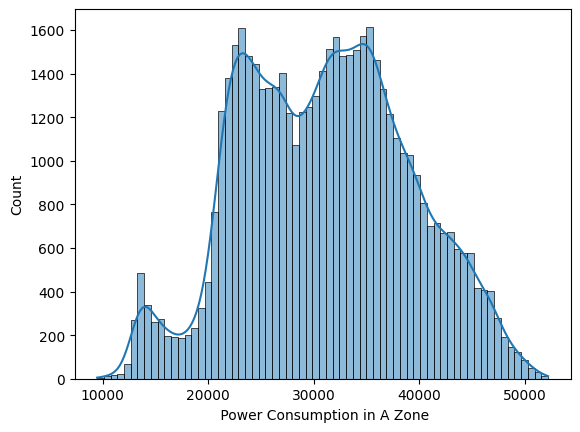

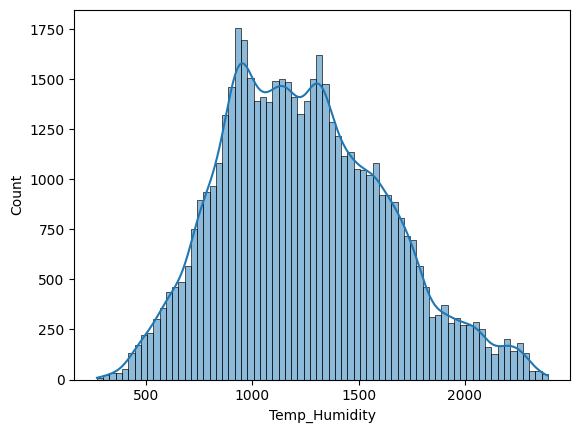

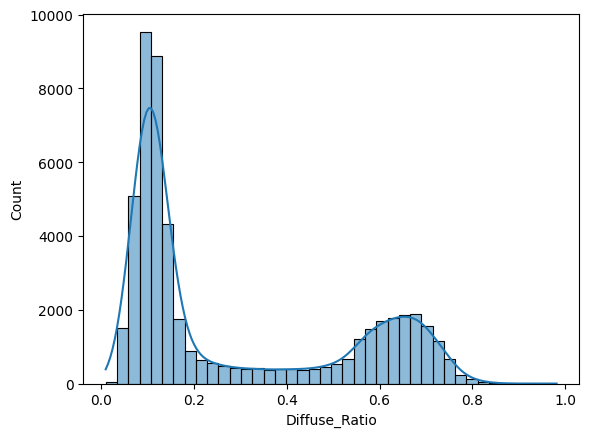

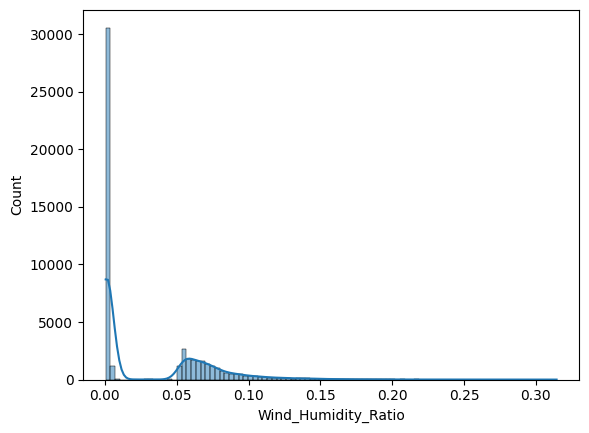

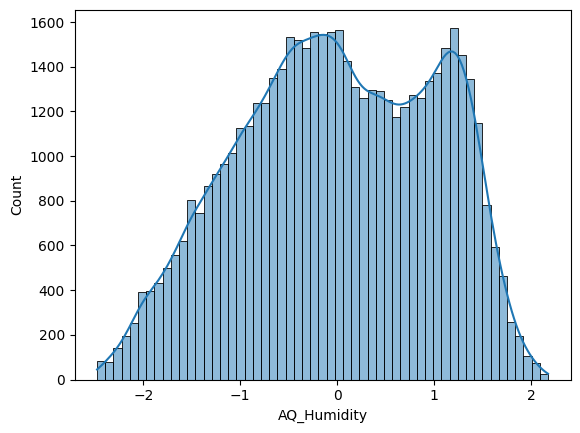

In [ ]:
# visualizing the skewness of the columns after applying Transformation techniques

print(df.skew())
for col in df.columns:
  sns.histplot(df[col], kde =True)
  plt.show()

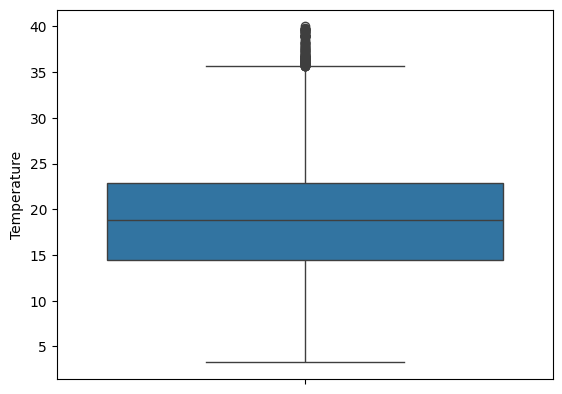

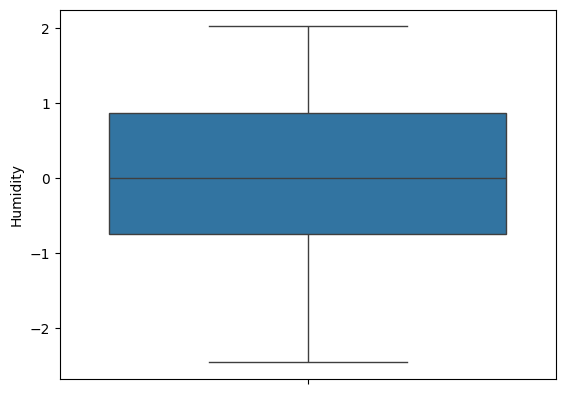

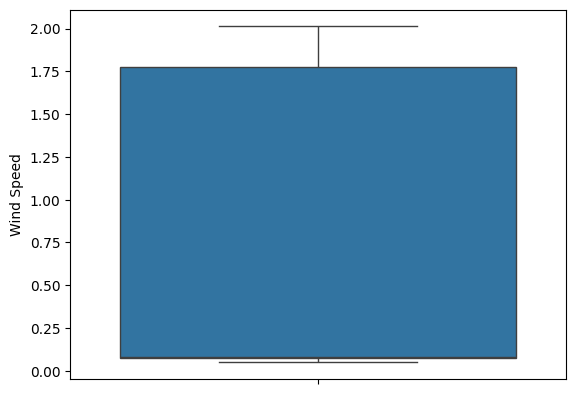

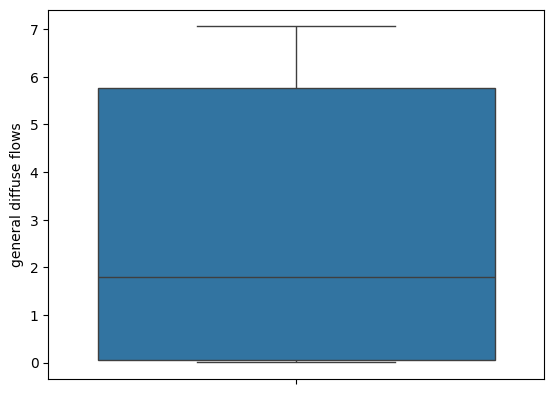

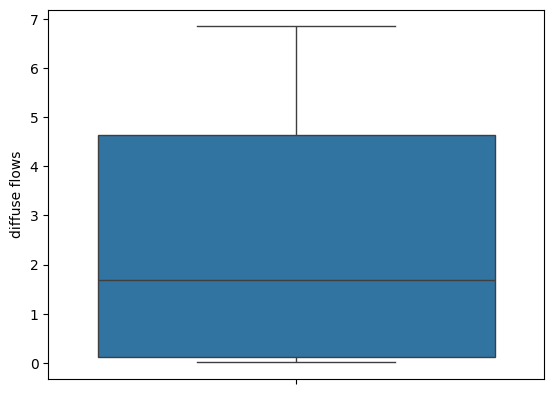

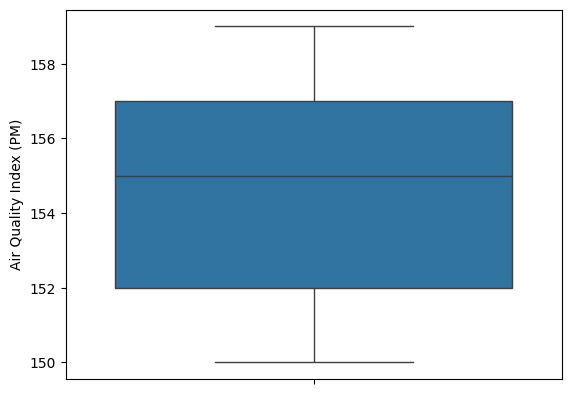

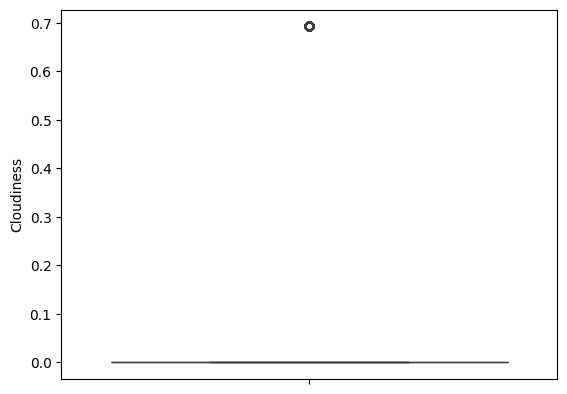

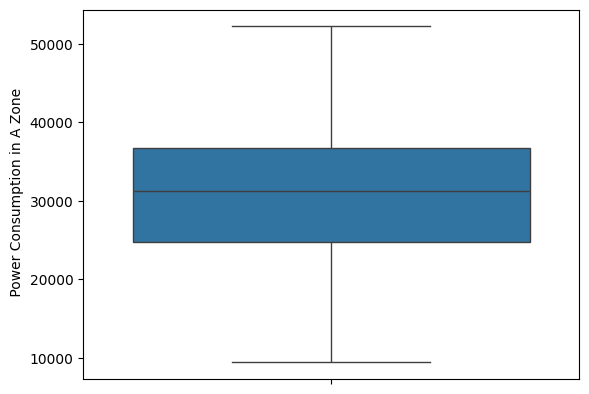

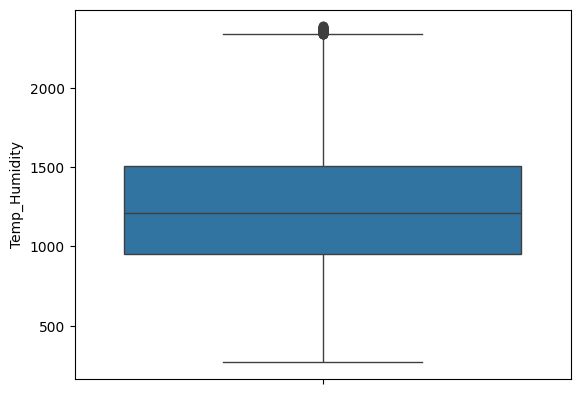

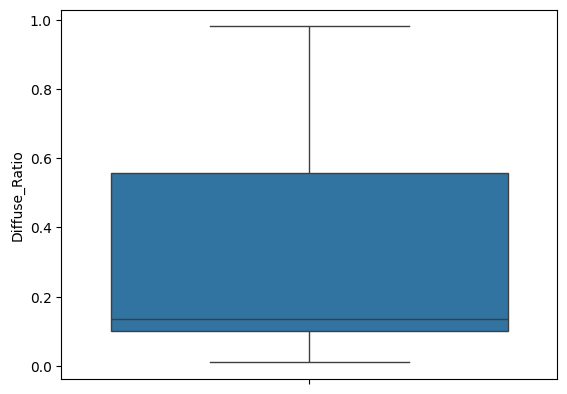

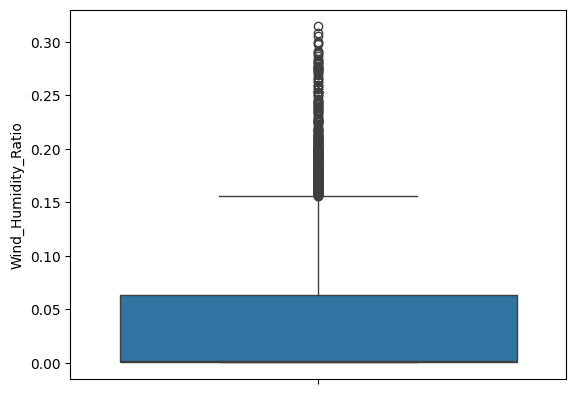

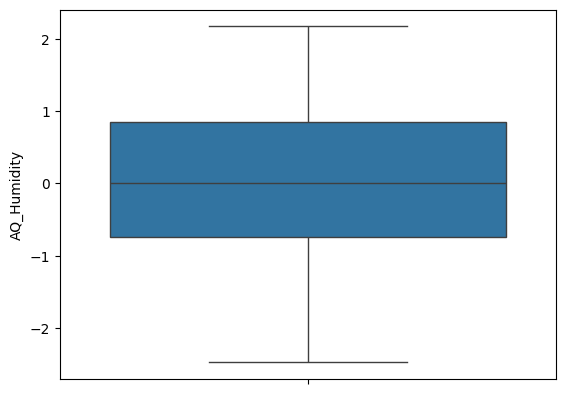

In [ ]:
# checking for outliers by using

def box(col):
    sns.boxplot(df[col])
    plt.show()


for i in df.columns:
    box(i)

In [ ]:
# Removing the outliers by using Inter Quartile Range (IQR) method

Q1 = np.percentile(df['Temperature'],25)
Q3 = np.percentile(df['Temperature'],75)
IQR = Q3-Q1
upperlimit = Q3 + 1.5*IQR
lowerlimit = Q1 - 1.5*IQR
df ['Temperature'] = np.where(df ['Temperature'] > upperlimit, upperlimit,df ['Temperature'])

Q1 = np.percentile(df['Humidity'],25)
Q3 = np.percentile(df['Humidity'],75)
IQR = Q3-Q1
upperlimit = Q3 + 1.5*IQR
lowerlimit = Q1 - 1.5*IQR
df ['Humidity'] = np.where(df ['Humidity'] > upperlimit, upperlimit,df ['Humidity'])

Q1 = np.percentile(df['Cloudiness'],25)
Q3 = np.percentile(df['Cloudiness'],75)
IQR = Q3-Q1
upperlimit = Q3 + 1.5*IQR
lowerlimit = Q1 - 1.5*IQR
df ['Cloudiness'] = np.where(df ['Cloudiness'] > upperlimit, upperlimit,df ['Cloudiness'])

Q1 = np.percentile(df['Temp_Humidity'],25)
Q3 = np.percentile(df['Temp_Humidity'],75)
IQR = Q3-Q1
upperlimit = Q3 + 1.5*IQR
lowerlimit = Q1 - 1.5*IQR
df ['Temp_Humidity'] = np.where(df ['Temp_Humidity'] > upperlimit, upperlimit,df ['Temp_Humidity'])

Q1 = np.percentile(df['Wind_Humidity_Ratio'],25)
Q3 = np.percentile(df['Wind_Humidity_Ratio'],75)
IQR = Q3-Q1
upperlimit = Q3 + 1.5*IQR
lowerlimit = Q1 - 1.5*IQR
df ['Wind_Humidity_Ratio'] = np.where(df ['Wind_Humidity_Ratio'] > upperlimit, upperlimit,df ['Wind_Humidity_Ratio'])


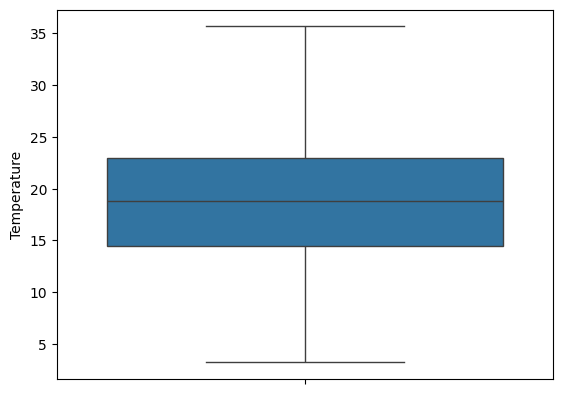

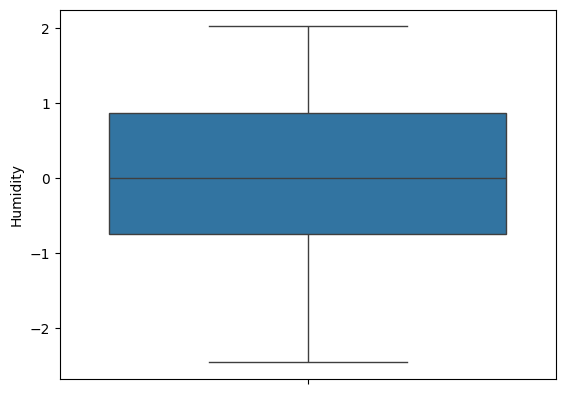

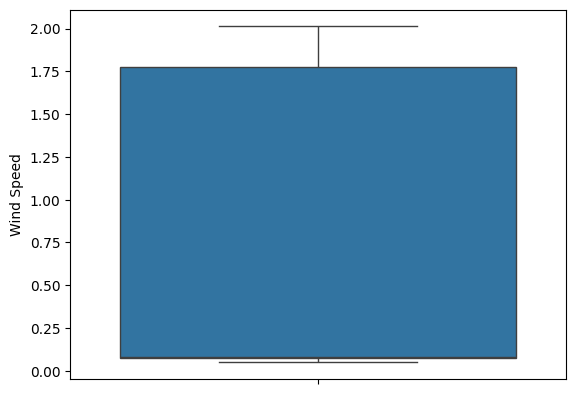

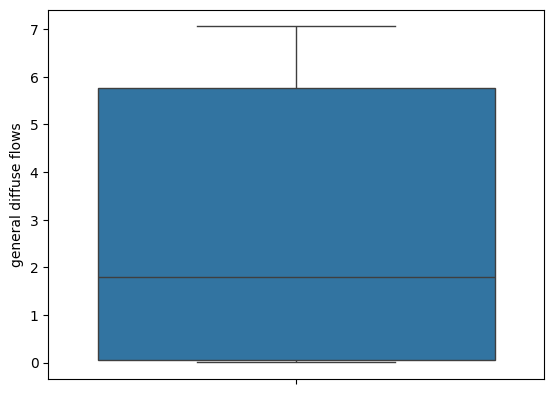

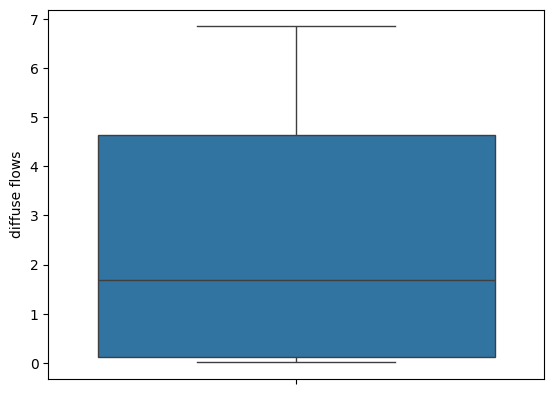

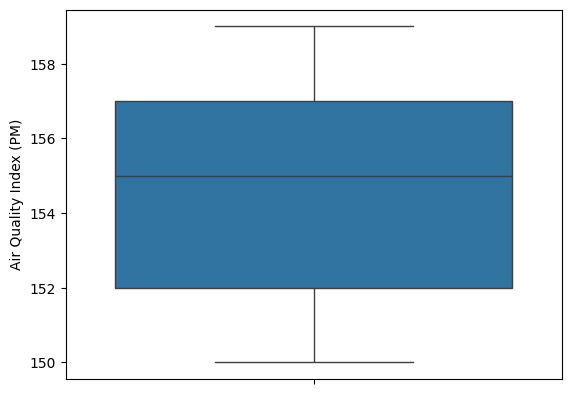

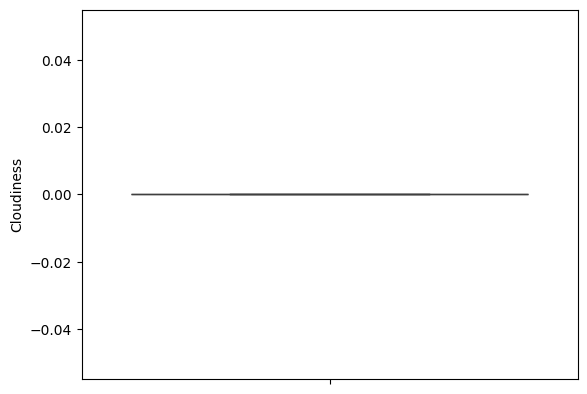

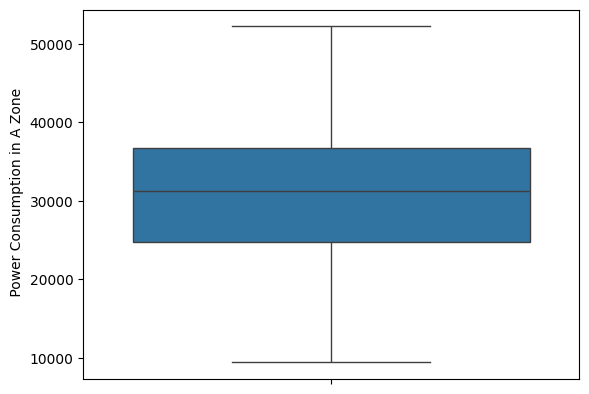

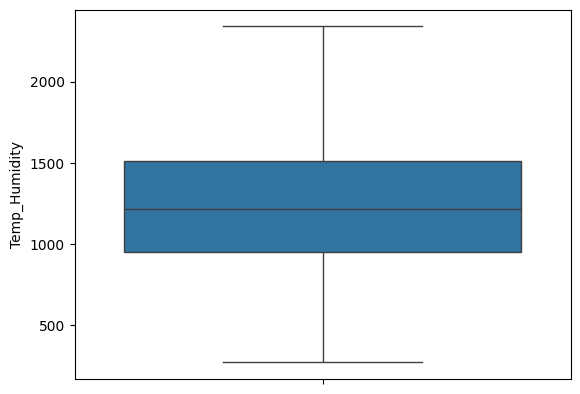

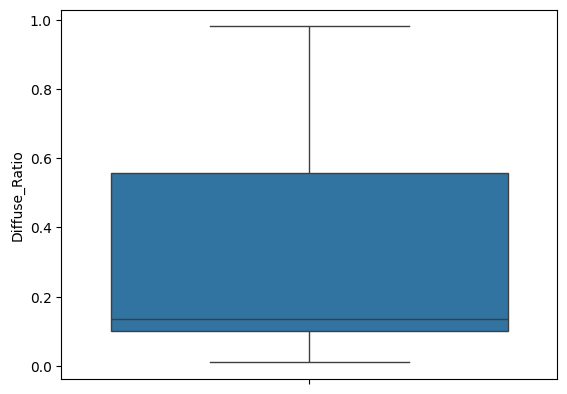

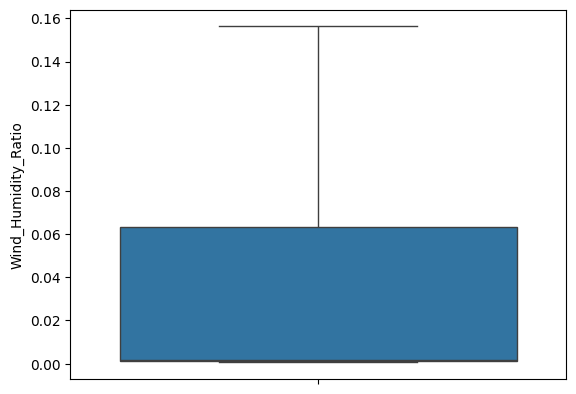

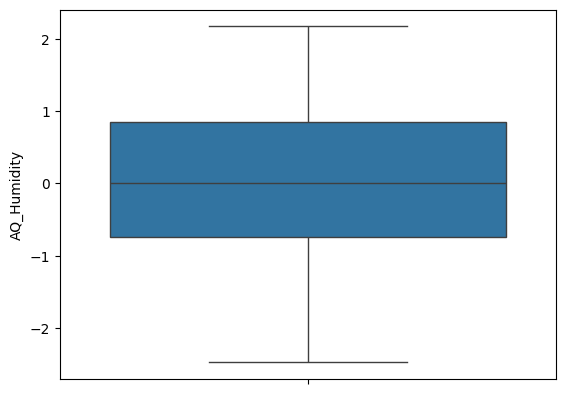

In [ ]:
# checking for Outliers after using IQR method

def box(col):
    sns.boxplot(df[col])
    plt.show()


for i in df.columns:
    box(i)

In [ ]:
# Dividing the dependent and Independent features

x = df.drop(columns=[' Power Consumption in A Zone'])
y = df[' Power Consumption in A Zone']

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)

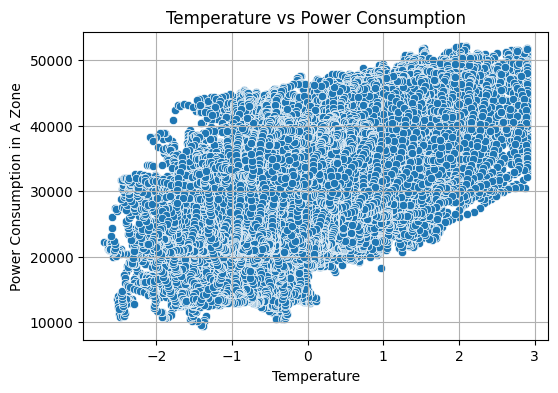

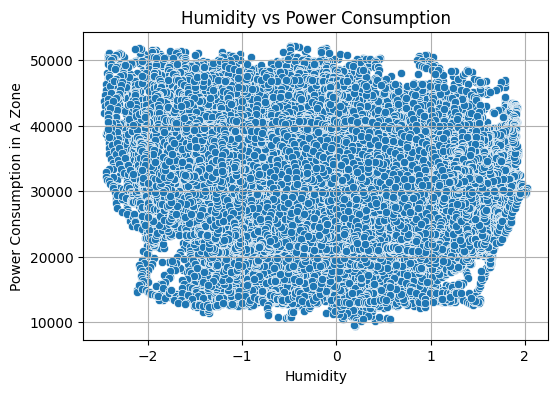

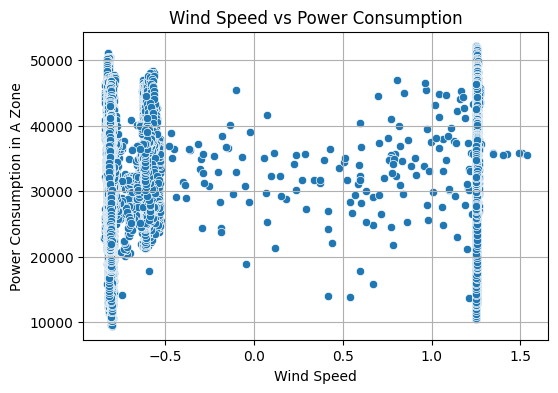

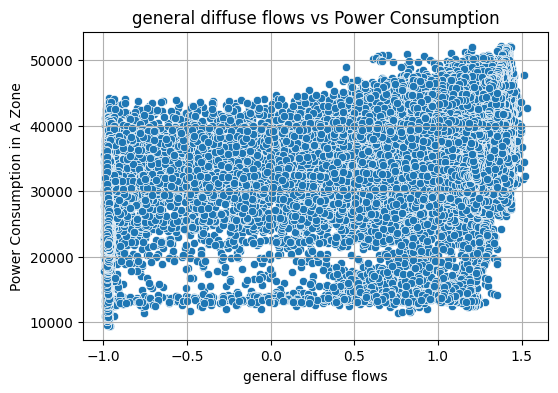

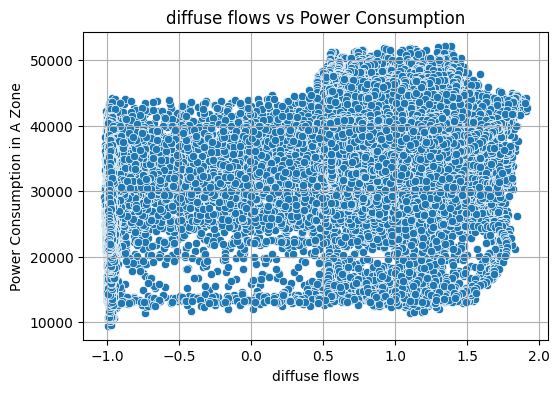

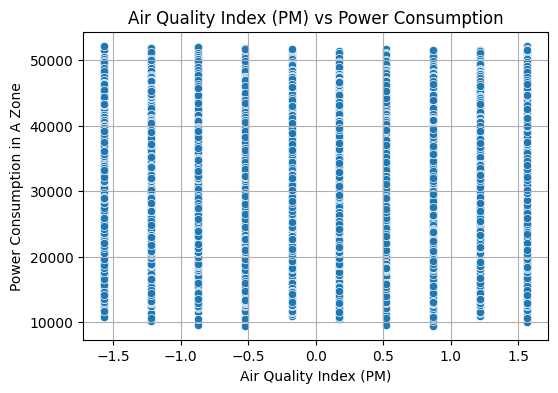

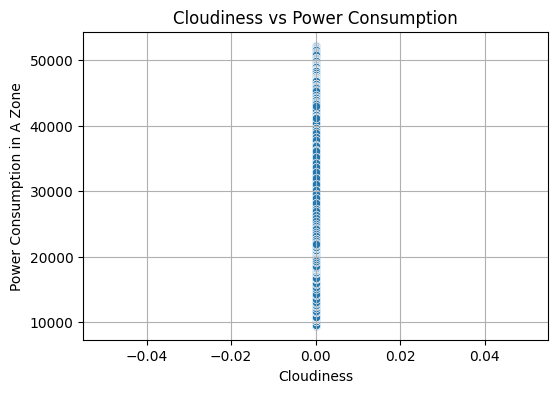

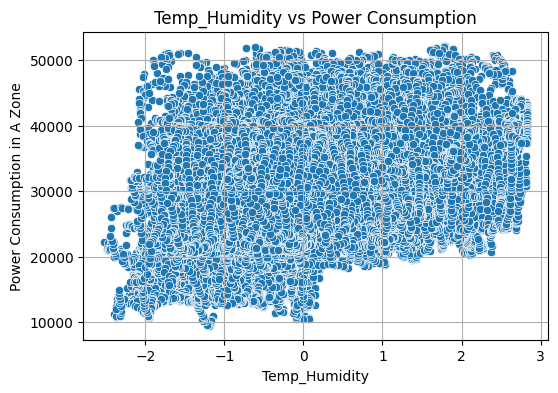

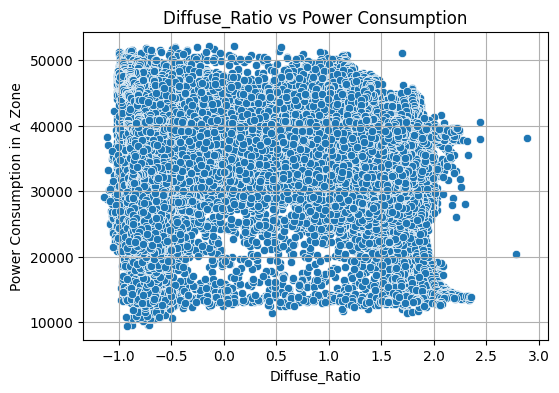

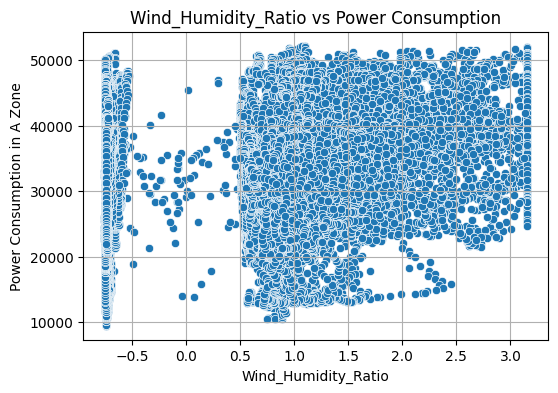

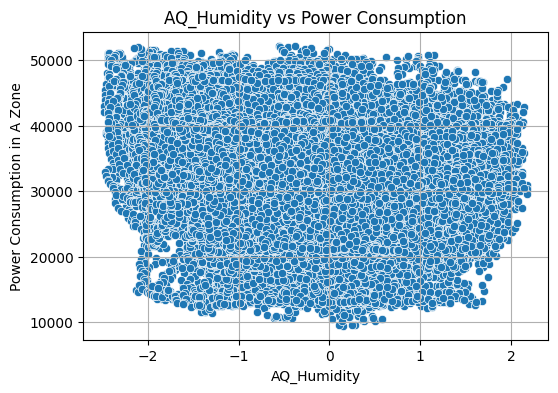

In [ ]:
# plotting the scatterplot between Independent Features vs Dependent Feature

import matplotlib.pyplot as plt
import seaborn as sns

for col in x_scaled.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=x_scaled[col], y=y)
    plt.title(f'{col} vs Power Consumption')
    plt.xlabel(col)
    plt.ylabel('Power Consumption in A Zone')
    plt.grid(True)
    plt.show()


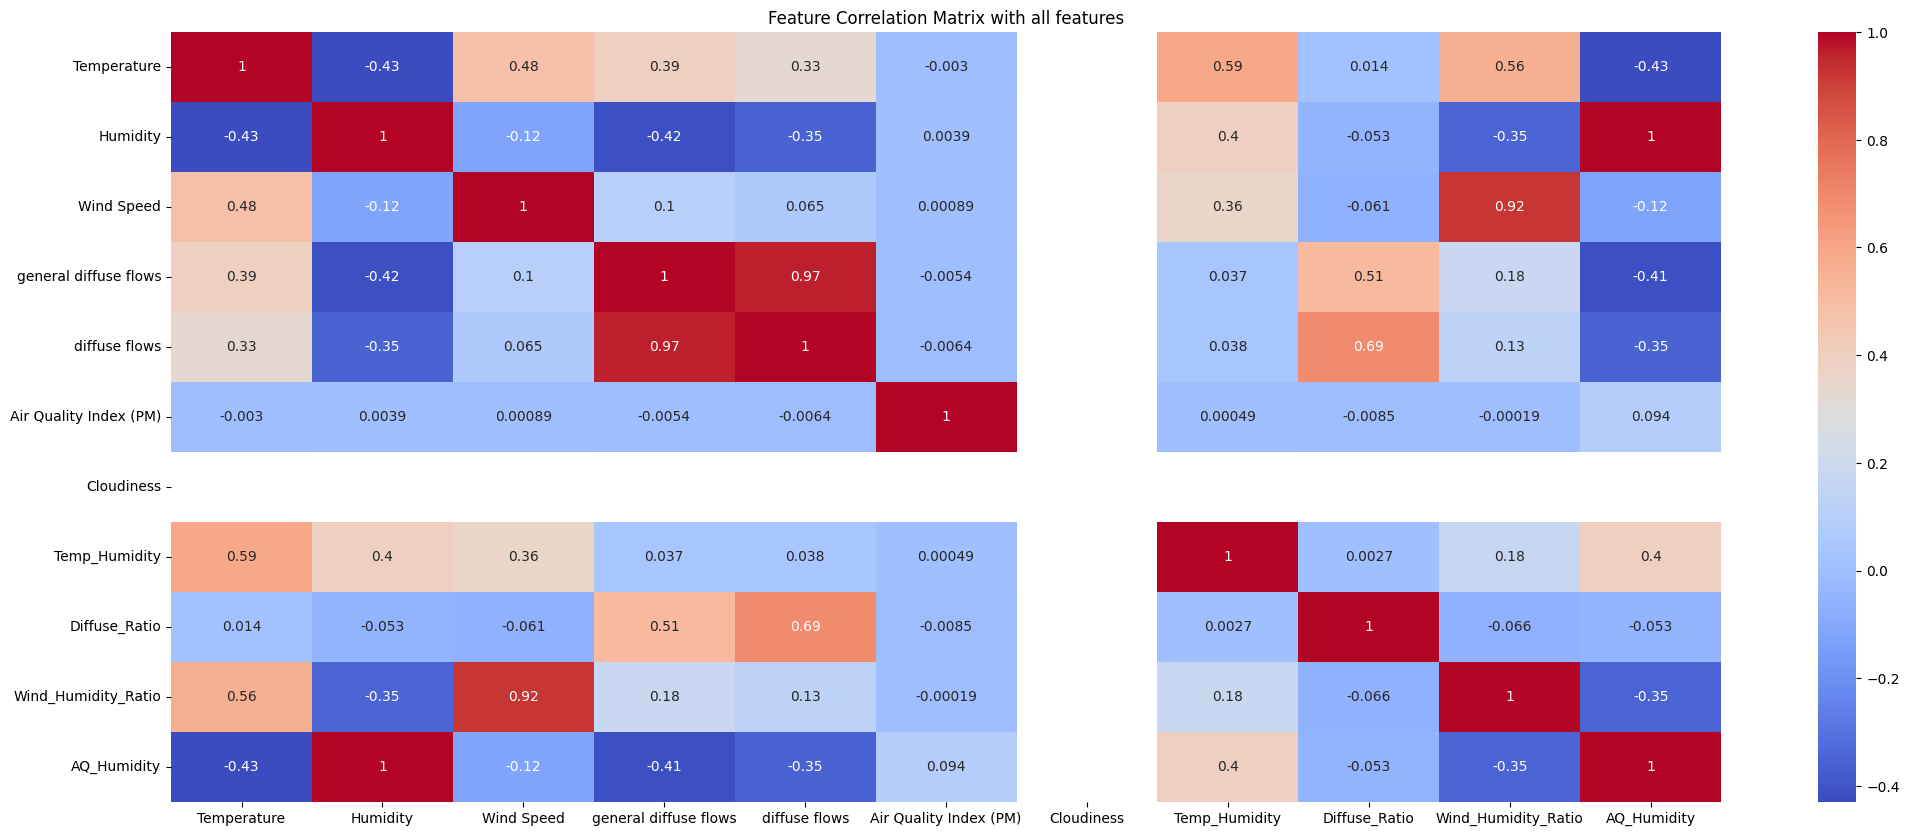

In [ ]:
# Visualization of Correlation Matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(x_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix with all features')
plt.show()


In [ ]:
# Calculating Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaled
vif = pd.DataFrame()
vif ['variance_inflation_factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Features'] = x.columns
vif

,variance_inflation_factor,Features
0,16.650123,Temperature
1,801.974828,Humidity
2,18.036160,Wind Speed
3,54.780167,general diffuse flows
4,76.770493,diffuse flows
5,7.589506,Air Quality Index (PM)
6,NaN,Cloudiness
7,15.603467,Temp_Humidity
8,6.993351,Diffuse_Ratio
9,21.665482,Wind_Humidity_Ratio


In [ ]:
# Removing the Irrelevant features based on VIF

x_scaled = x_scaled.drop(['general diffuse flows', 'Cloudiness', 'AQ_Humidity'], axis = 1)
x_scaled.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'diffuse flows',
       'Air Quality Index (PM)', 'Temp_Humidity', 'Diffuse_Ratio',
       'Wind_Humidity_Ratio'],
      dtype='object')

In [ ]:
# Calculating Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaled
vif = pd.DataFrame()
vif ['variance_inflation_factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Features'] = x_scaled.columns
vif

,variance_inflation_factor,Features
0,16.483352,Temperature
1,7.682286,Humidity
2,18.030231,Wind Speed
3,2.671158,diffuse flows
4,1.000094,Air Quality Index (PM)
5,15.454263,Temp_Humidity
6,2.233749,Diffuse_Ratio
7,21.645535,Wind_Humidity_Ratio


In [ ]:
# Removing the Irrelevant features based on VIF

x_scaled = x_scaled.drop(['Wind_Humidity_Ratio'], axis = 1)
x_scaled.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'diffuse flows',
       'Air Quality Index (PM)', 'Temp_Humidity', 'Diffuse_Ratio'],
      dtype='object')

In [ ]:
# Calculating Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaled

vif = pd.DataFrame()
vif ['variance_inflation_factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Features'] = x_scaled.columns
vif

,variance_inflation_factor,Features
0,8.666262,Temperature
1,6.421594,Humidity
2,1.327388,Wind Speed
3,2.648874,diffuse flows
4,1.000094,Air Quality Index (PM)
5,7.933607,Temp_Humidity
6,2.228053,Diffuse_Ratio


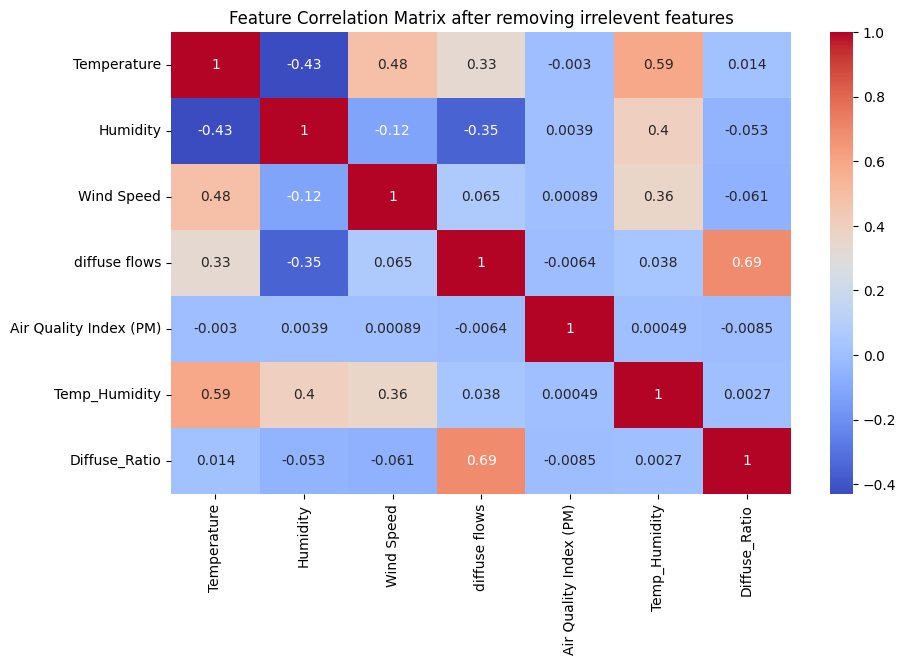

In [ ]:
# Visualization of Correlation Matrix after removing irrelevent features

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(x_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix after removing irrelevent features')
plt.show()


In [ ]:
# Splitting the data into training and testing data

from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Building a Linear Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Linear_Regressor = LinearRegression()
Linear_Regressor.fit(x_train,y_train)

y_pred = Linear_Regressor.predict(x_test)
r2 = r2_score(y_pred,y_test)
mse = mean_squared_error(y_pred, y_test)
print(r2)
print(mse)

-1.0143893373998232
42959904.77622589


In [ ]:
# OLS method

import statsmodels.api as sm
x_const = sm.add_constant(x_scaled)
x_const = x_const.reset_index(drop=True)
y_aligned = y.reset_index(drop=True)


model = sm.OLS(y_aligned, x_const).fit()

print(model.summary())


                                 OLS Regression Results                                 
Dep. Variable:      Power Consumption in A Zone   R-squared:                       0.328
Model:                                      OLS   Adj. R-squared:                  0.328
Method:                           Least Squares   F-statistic:                     3637.
Date:                          Sat, 12 Jul 2025   Prob (F-statistic):               0.00
Time:                                  09:13:55   Log-Likelihood:            -5.3231e+05
No. Observations:                         52145   AIC:                         1.065e+06
Df Residuals:                             52137   BIC:                         1.065e+06
Df Model:                                     7                                         
Covariance Type:                      nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [ ]:
# Building a Polynomial Regression model

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Degree 2 or 3 polynomial regression
model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Evaluation
from sklearn.metrics import r2_score, mean_squared_error
print("R2:", r2_score(y_pred,y_test))
print("MSE:", mean_squared_error(y_pred,y_test))

R2: -1.0143893373998232
MSE: 42959904.77622589


In [ ]:
# Building a Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
RF_Regressor = RandomForestRegressor(n_estimators=100)
RF_Regressor.fit(x_train, y_train)
y_pred = RF_Regressor.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print("R2:", r2_score(y_pred,y_test))
print("MSE:", mean_squared_error(y_pred,y_test))

R2: 0.3801252737790636
MSE: 23168248.410260294


In [ ]:
# HyperParameterTuning (GridSearchCV)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train, y_train)

print(" Best Parameters Found:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print(" R² Score:", r2_score(y_test, y_pred))
print(" MSE:", mean_squared_error(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
 Best Parameters Found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
 R² Score: 0.626448508459819
 MSE: 24009275.958807886


In [ ]:
# HyperParameterTuning (RandomizedSearchCV)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
import numpy as np

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

print(" Best Parameters:", random_search.best_params_)
print(" Best R² Score (CV):", random_search.best_score_)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(x_test)

print(" Final R² on Test Set:", r2_score(y_test, y_pred))
print(" Final RMSE on Test Set:", root_mean_squared_error(y_test, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
 Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
 Best R² Score (CV): 0.6261033090675016
 Final R² on Test Set: 0.6519631825657575
 Final RMSE on Test Set: 4738.404067159122


In [ ]:
 # Building a GradientBoostingRegressor model

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
GB_Regressor = GradientBoostingRegressor(n_estimators=100)
GB_Regressor.fit(x_train, y_train)
y_pred = GB_Regressor.predict(x_test)

# Evaluation
r2 = r2_score(y_pred, y_test)
rmse = root_mean_squared_error(y_pred, y_test)
print(r2)
print(rmse)

-0.5101236628091024
6042.3740869848025


In [ ]:
# BUilding a XGBRegressor model

from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f" R² Score: {r2:.4f}")
print(f" Root Mean Squared Error: {rmse:.2f}")

 R² Score: 0.5028
 Root Mean Squared Error: 5652.79


In [ ]:
# HyperParameterTuning (GridSearchCV)

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_train, y_train)

print(" Best Parameters:", grid_search.best_params_)
print(" Best R² Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error

print(" Final R² on Test Set:", r2_score(y_test, y_pred))
print(" Final RMSE on Test Set:", root_mean_squared_error(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
 Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
 Best R² Score: 0.5780251348627734
 Final R² on Test Set: 0.5964646421377127
 Final RMSE on Test Set: 5092.782056462274


In [ ]:
# HyperParameterTuning (RandomizedSearchCV)

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, root_mean_squared_error

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

xgb_model = XGBRegressor(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

print(" Best Parameters:", random_search.best_params_)
print(" Best CV R² Score:", random_search.best_score_)

best_xgb_model = random_search.best_estimator_
y_pred = best_xgb_model.predict(x_test)

print(" Final R² on Test Set:", r2_score(y_test, y_pred))
print(" Final RMSE on Test Set:", root_mean_squared_error(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
 Best Parameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
 Best CV R² Score: 0.5797441521142662
 Final R² on Test Set: 0.5962413568647227
 Final RMSE on Test Set: 5094.190837565736


In [ ]:
# Building a StackingRegressor model

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

base_models = [
    ('rf', RandomForestRegressor(n_estimators=100)),
    ('gb', GradientBoostingRegressor(n_estimators=100)),
    ('xgb', XGBRegressor(n_estimators=100))
]

stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression()
)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
stacked_model.fit(x_train, y_train)
y_pred = stacked_model.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error
print("Stacked R2:", r2_score(y_test, y_pred))
print("Stacked RMSE:", root_mean_squared_error(y_test, y_pred))


Stacked R2: 0.6577968923693673
Stacked RMSE: 4698.524249728529


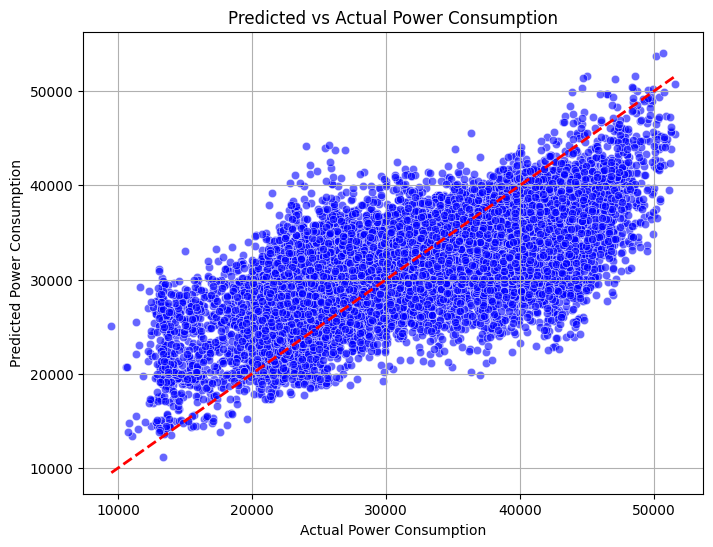

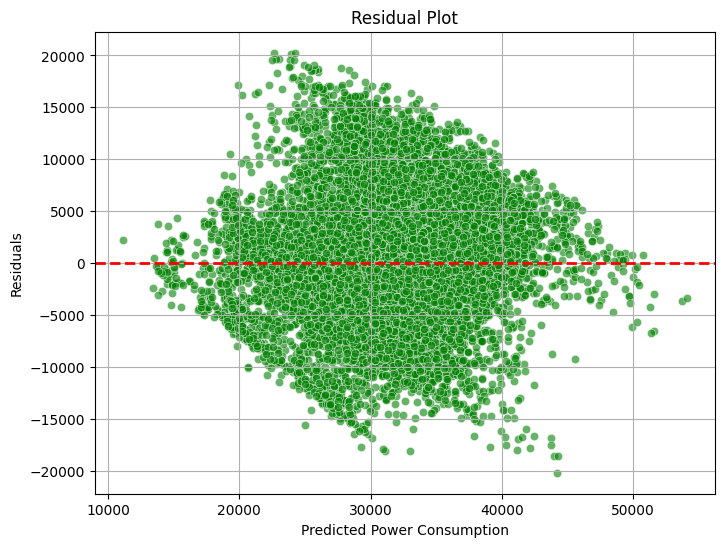

In [ ]:
 import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predicted vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # 45-degree reference line
plt.xlabel("Actual Power Consumption")
plt.ylabel("Predicted Power Consumption")
plt.title("Predicted vs Actual Power Consumption")
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Power Consumption")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


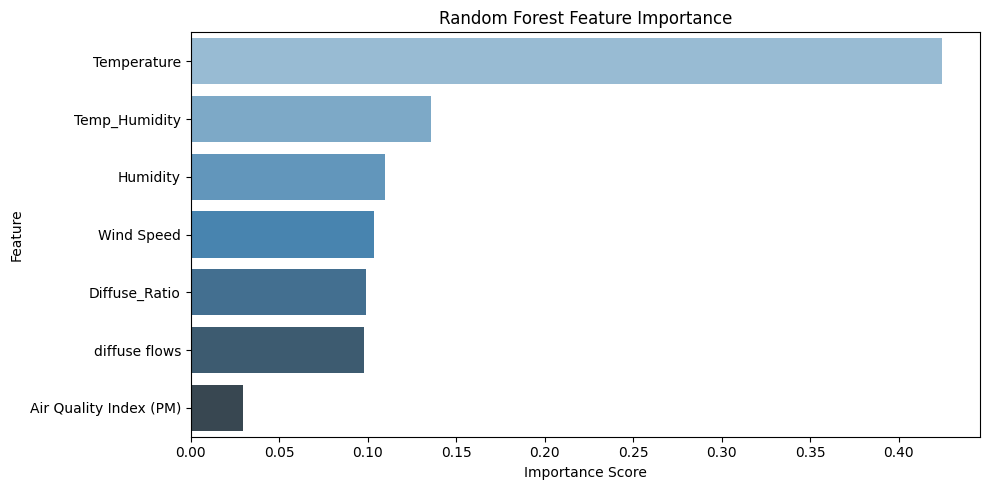

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_scaled, y)

rf_importance = pd.Series(rf.feature_importances_, index=x_scaled.columns)
rf_importance = rf_importance.sort_values(ascending=False)


plt.figure(figsize=(10, 5))
sns.barplot(x=rf_importance.values, y=rf_importance.index, palette='Blues_d')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()